### 【 데이터 시각화 - 여러개 그래프 그리기 】
- 데이터셋 : iris.csv
- 해결문제 : 품종별 시각화에 적합한 특성/속성/컬럼 선정 
- 출력결과 : 선정된 특성을 기반으로 품종 분류한 것 시각화

[1] 모듈 로딩 및 데이터 준비<hr>

In [61]:
## 모듈 로딩
import pandas as pd                     ## 데이터 분석용
import matplotlib.pyplot as plt         ## 데이터 시각화용 

In [62]:
## 데이터 준비
DATA_FILE = '../Data/iris.csv'

In [63]:
## CSV => DataFrame 로딩
irisDF = pd.read_csv(DATA_FILE)

[2] 데이터 확인<hr>

In [64]:
## ----------------------------------------------------------
## [2-1] 기본 데이터 확인 :  head(), info(), describe() 
## -> 컬럼별 결측치 여부
## -> 컬럼별 실제데이터와 요약정보 데이터 타입 일치여부
## -> 컬럼벼 데이터 분포 : 수치형/범주형
## ----------------------------------------------------------
## - 실제 데이터 일부 출력
display(irisDF.head(3))

## - DF 요약 정보 출력
irisDF.info()

## - 컬럼별 통계치/분포 확인 출력
display(irisDF.describe(include='all'))

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [65]:
## --------------------------------------------------------------
## [2-2] 수치형 컬럼들의 상관계수 
## -------------------------------------------------------------
## - 자료형 변환 
irisDF.variety = irisDF.variety.astype('category')

## - Text 카테고리 이름 추출
variety_name   = irisDF.variety.cat.categories.to_list()

## - Text 카테고리 => int 카테고리 변환
irisDF.variety = irisDF.variety.cat.codes

## - variety컬럼과 다른 수치형 컬럼들의 상관계수
corrSR = irisDF.corr(numeric_only=True)['variety'].sort_values(ascending=False)
corrSR

variety         1.000000
petal.width     0.956547
petal.length    0.949035
sepal.length    0.782561
sepal.width    -0.426658
Name: variety, dtype: float64

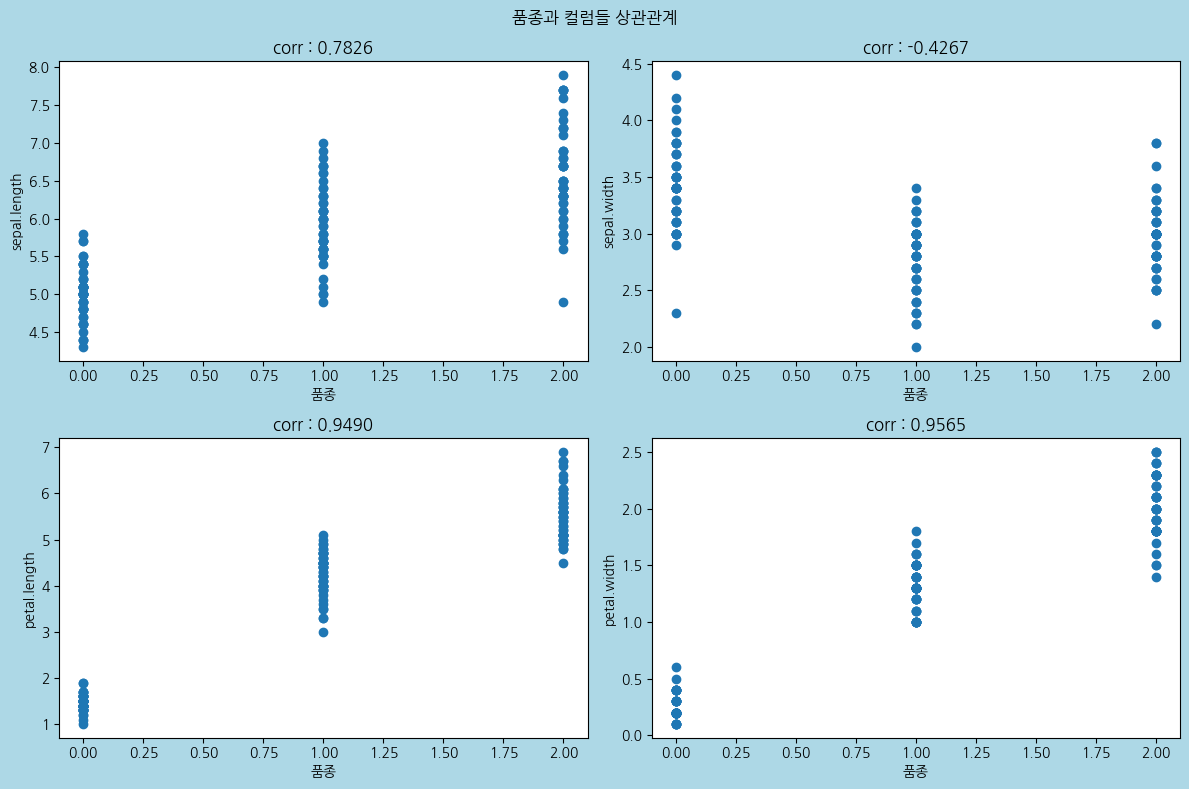

In [66]:
## ------------------------------------------------------------------------
## 시각화 : 여러개 1개 figure에 출력. 1행 4열 또는 2행 2열
## ------------------------------------------------------------------------
## 방법1] plt.subplot() 
## ------------------------------------------------------------------------

plt.figure(figsize=(12,8), facecolor='lightblue')
for idx in range(4):
    plt.subplot(2,2,idx+1)
    plt.scatter(irisDF.variety, irisDF[irisDF.columns[idx]] )
    plt.xlabel('품종')
    plt.ylabel(f'{irisDF.columns[idx]}')
    plt.title(f'corr : {corrSR[irisDF.columns[idx]]:.4f}')

plt.suptitle("품종과 컬럼들 상관관계")
plt.tight_layout()
plt.show()


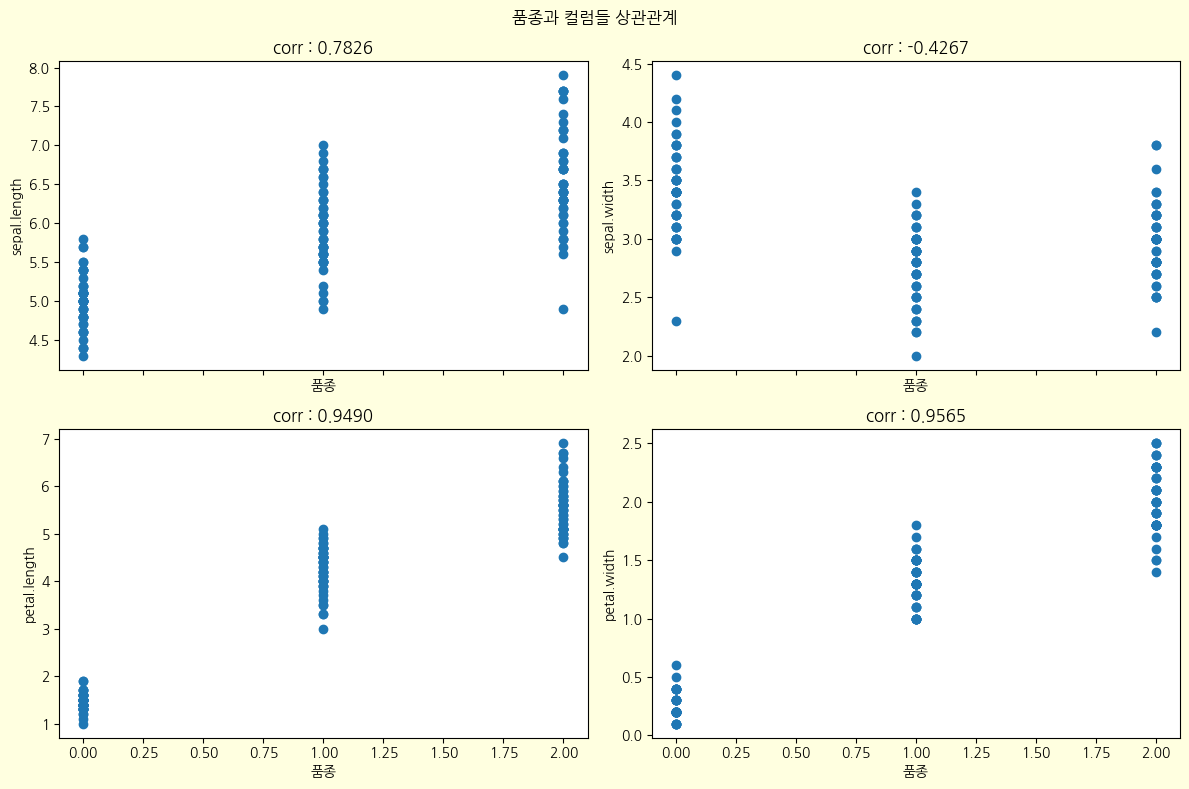

In [67]:
## ------------------------------------------------------------- 
## 방법2] plt.subplots(행,열) -> figure객체, axes 객체 리스트 반환
## ------------------------------------------------------------- 
fig, axes = plt.subplots(2,2, sharex=True, figsize=(12, 8))
fig.set_facecolor('lightyellow')

## 2D => 1D List
axes = axes.flatten()

for ax, col in zip(axes, irisDF.columns[:-1]):    ## (axes0, 컬럼명0), (axes1, 컬럼명1), ..., (axes3, 컬럼명3)
    ax.scatter(irisDF.variety, irisDF[col] )
    ax.set_xlabel('품종')
    ax.set_ylabel(f'{col}')
    ax.set_title(f'corr : {corrSR[col]:.4f}')

plt.suptitle("품종과 컬럼들 상관관계")
plt.tight_layout()
plt.show()

[3] 컬럼과 컬럼의 관계성/산점도 <hr>

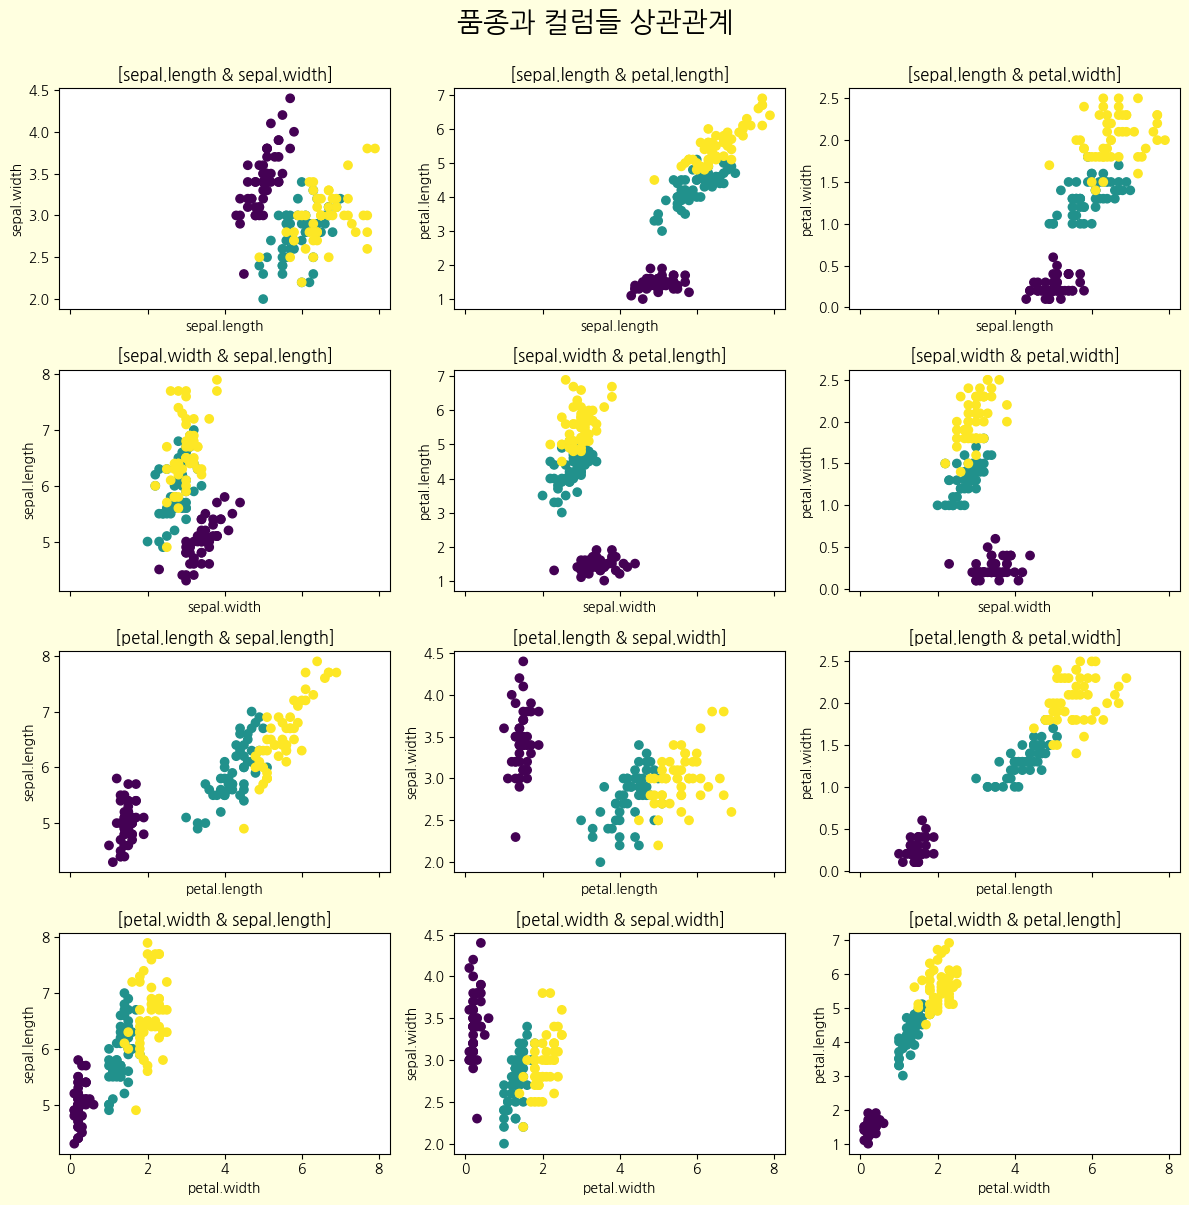

In [90]:
## ------------------------------------------------------------- 
## 방법2] plt.subplots(행,열) -> figure객체, axes 리스트 반환
## ------------------------------------------------------------- 
## - 전체 컬럼수 : 행,  대응될 컬럼수 : 열
NROW , NCOL = irisDF.shape[1]-1, irisDF.shape[1] -2


## - 행x열 개수의 그래프 인스턴스 생성 및 배경색 설정 
fig, axes = plt.subplots(NROW, NCOL, sharex=True, figsize=(12, 12))
fig.set_facecolor('lightyellow')

## - 각 axes 객체에 그래프 추가 
NCOLS = irisDF.columns[:-1].shape[0]
for rIdx in range(NROW):

    cols = [ idx for idx in range(NCOLS) if rIdx != idx]
    for cIdx  in range(NCOL):
        xCol, yCol = irisDF.columns[rIdx], irisDF.columns[cols[cIdx]]
        ## => c 매개변수 : 품종별 다른 색상 
        axes[rIdx,cIdx].scatter(irisDF[xCol],  irisDF[yCol], c=irisDF.variety)
        axes[rIdx,cIdx].set_xlabel(f'{xCol}')
        axes[rIdx,cIdx].set_ylabel(f'{yCol}')
        axes[rIdx,cIdx].set_title(f'[{xCol} & {yCol}]')
    
plt.suptitle("품종과 컬럼들 상관관계", y=1., fontsize=20)
plt.tight_layout()
plt.show()

[3] 컬럼과 컬럼 관계 + 사용자 정의 범례 <hr>
- 원하는 라벨 항목 
- 원하는 위치 
- 원하는 마커 설정
- 방법 : 범례 핸들러 생성 및 적용 필요

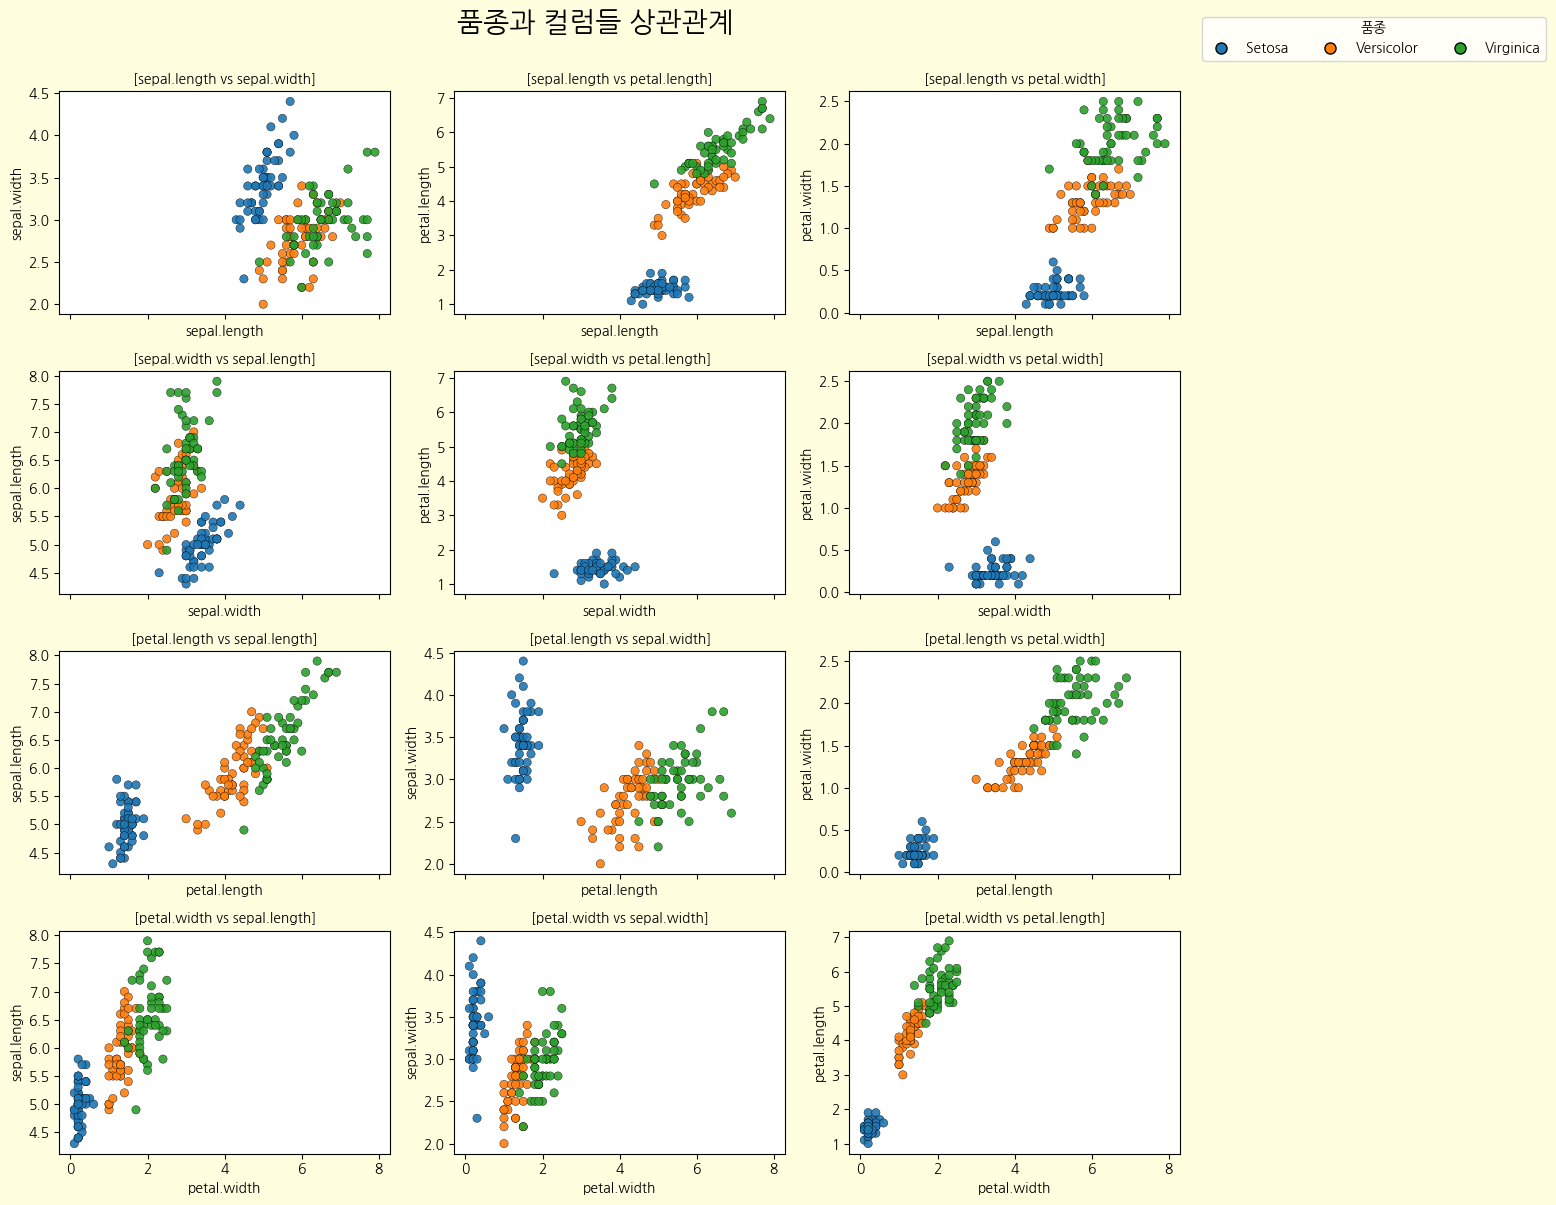

In [89]:
## ==> 모듈 로딩 
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D

## ==> 품종별 색상 설정 
cmap_ = ListedColormap(['tab:blue', 'tab:orange', 'tab:green'])

## ==> 범례용 핸들(품종 이름과 색을 매칭)
##   - 범례의 모양, 순서, 관련 아티스트와 연결되는 데 사용
##   - 사용자가 범례를 더 세밀하게 제어할 수 있게 해줌!
legend_handles = [Line2D([0],[0], 
                          marker='o', linestyle='',
                          markerfacecolor=cmap_(i), markeredgecolor='k',
                          label=lab, markersize=8) for i, lab in enumerate(variety_name) ]

## ==>  컬럼과 컬럼 그래프 시각화
## - 전체 컬럼수 : 행,  대응될 컬럼수 : 열
NROW , NCOL = irisDF.shape[1]-1, irisDF.shape[1] -2

## - 행 x 열 수만큼 axes 인스턴스 생성 및 배경색
fig, axes = plt.subplots(NROW, NCOL, sharex=True, figsize=(12, 12))
fig.set_facecolor('lightyellow')

## - 각 axes 인스턴스 마다 그래프 추가 
NCOLS = irisDF.columns[:-1].shape[0]
for rIdx in range(NROW):
    cols = [idx for idx in range(NCOLS) if rIdx != idx]
    for cIdx in range(NCOL):
        xCol, yCol = irisDF.columns[rIdx], irisDF.columns[cols[cIdx]]

        ## 품종별 그래프 ->  c 매개변수 : 수치값 품종 컬럼 지정
        axes[rIdx, cIdx].scatter(   irisDF[xCol], irisDF[yCol],
                                    c=irisDF.variety, cmap=cmap_,
                                    alpha=0.9, edgecolor='k', linewidths=0.3 )
        axes[rIdx, cIdx].set_xlabel(xCol)
        axes[rIdx, cIdx].set_ylabel(yCol)
        axes[rIdx, cIdx].set_title(f'[{xCol} vs {yCol}]', fontsize=10)
        # - 그래프마다 범례
        # axes[rIdx, cIdx].legend(handles=legend_handles, 
        #                         title='품종',
        #                         loc='upper center', 
        #                         ncol=len(variety_name), 
        #                         frameon=True)

## - 그림 상단에 품종 범례 한 번만 추가 
fig.legend(handles=legend_handles,
           title='품종',
           loc='upper left', 
           ncol=len(variety_name), 
           frameon=True, 
           bbox_to_anchor=(1.,1))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle("품종과 컬럼들 상관관계", y=1, fontsize=20)
plt.show()
